In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [19]:
df=pd.read_csv('C:/Users/samaher/Desktop/Data/final_prepr.csv',index_col=0)

In [20]:
df.head()

,Project Current Status,Project Cost,Project Grade Level Category_Grades 3-5,Project Grade Level Category_Grades 6-8,Project Grade Level Category_Grades 9-12,Project Grade Level Category_Grades PreK-2,Project Grade Level Category_unknown,Project Posted Month_1,Project Posted Month_10,Project Posted Month_11,...,School State_South Dakota,School State_Tennessee,School State_Texas,School State_Utah,School State_Vermont,School State_Virginia,School State_Washington,School State_West Virginia,School State_Wisconsin,School State_Wyoming
0,1,361.80,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,416.24,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,829.08,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,478.98,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,869.98,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df['Project Current Status'].value_counts()

1    736176
0    239213
Name: Project Current Status, dtype: int64

In [22]:
features = df.loc[:, df.columns != 'Project Current Status']
target = df['Project Current Status']

In [23]:
training_features, test_features, training_target, test_target = train_test_split(features, target,
                                                                                  test_size = .2, random_state=0)

In [24]:
training_features=training_features.values
test_features=test_features.values
training_target = training_target.values
test_target=test_target.values

In [25]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .2,
                                                  random_state=0)

In [26]:
sm = SMOTE(random_state=0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [27]:
print(x_train.shape)
print(x_val.shape)
print(test_features.shape)

(624248, 103)
(156063, 103)
(195078, 103)


In [28]:
print(x_train_res.shape)

(941766, 103)


In [31]:
rf_clf = RandomForestClassifier(n_estimators=50, random_state=0)
rf_clf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [30]:
#RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=50, random_state=0)
rf_clf.fit(x_train_res, y_train_res)

print('\nValidation Results')
print ('Accuracy:',rf_clf.score(x_val, y_val))
print ('Recall:' ,recall_score(y_val, rf_clf.predict(x_val)))
print ('precision:' ,precision_score(y_val, rf_clf.predict(x_val)))
print ('F1 score:' ,f1_score(y_val, rf_clf.predict(x_val)))

print ('\nTest Results')
print ('Accuracy:' ,rf_clf.score(test_features, test_target))
print ('Recall:' , recall_score(test_target, rf_clf.predict(test_features)))
print ('precision:' , precision_score(test_target, rf_clf.predict(test_features)))
print ('F1 score:' ,f1_score(test_target, rf_clf.predict(test_features)))
print ('AUC:' ,roc_auc_score(test_target, rf_clf.predict(test_features)))

conf_mat = confusion_matrix(y_true=test_target, y_pred=rf_clf.predict(test_features))
print('Confusion matrix:\n', conf_mat)


Validation Results
Accuracy: 0.746788156065
Recall: 0.896576247079
precision: 0.795039076283
F1 score: 0.842760338537

Test Results
Accuracy: 0.747342088806
Recall: 0.897157843957
precision: 0.794503980312
F1 score: 0.842716277882
AUC: 0.592093671148
Confusion matrix:
 [[ 13749  34152]
 [ 15136 132041]]


In [32]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train_res, y_train_res)

print('\nValidation Results')
print ('Accuracy:',logreg.score(x_val, y_val))
print ('Recall:' ,recall_score(y_val, logreg.predict(x_val)))
print ('precision:' ,precision_score(y_val, logreg.predict(x_val)))
print ('F1 score:' ,f1_score(y_val, logreg.predict(x_val)))

print ('\nTest Results')
print ('Accuracy:' ,logreg.score(test_features, test_target))
print ('Recall:' , recall_score(test_target, logreg.predict(test_features)))
print ('precision:' , precision_score(test_target, logreg.predict(test_features)))
print ('F1 score:' ,f1_score(test_target, logreg.predict(test_features)))
print ('AUC:' ,roc_auc_score(test_target, logreg.predict(test_features)))


conf_mat = confusion_matrix(y_true=test_target, y_pred=logreg.predict(test_features))
print('Confusion matrix:\n', conf_mat)

C:\DCU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Validation Results
Accuracy: 0.656158090002
Recall: 0.673795252125
precision: 0.840250430229
F1 score: 0.747872745298

Test Results
Accuracy: 0.656327212705
Recall: 0.674161044185
precision: 0.838666869527
F1 score: 0.74746972522
AUC: 0.637846685638
Confusion matrix:
 [[28814 19087]
 [47956 99221]]


In [33]:
#DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier().fit(x_train_res, y_train_res)


print('\nValidation Results')
print ('Accuracy:',dt_clf.score(x_val, y_val))
print ('Recall:' ,recall_score(y_val, dt_clf.predict(x_val)))
print ('precision:' ,precision_score(y_val, dt_clf.predict(x_val)))
print ('F1 score:' ,f1_score(y_val, dt_clf.predict(x_val)))

print ('\nTest Results')
print ('Accuracy:' ,dt_clf.score(test_features, test_target))
print ('Recall:' , recall_score(test_target, dt_clf.predict(test_features)))
print ('precision:' , precision_score(test_target, dt_clf.predict(test_features)))
print ('F1 score:' ,f1_score(test_target, dt_clf.predict(test_features)))
print ('AUC:' ,roc_auc_score(test_target, dt_clf.predict(test_features)))


conf_mat = confusion_matrix(y_true=test_target, y_pred=dt_clf.predict(test_features))
print('Confusion matrix:\n', conf_mat)


Validation Results
Accuracy: 0.685755111718
Recall: 0.78901249619
precision: 0.794392921682
F1 score: 0.791693567569

Test Results
Accuracy: 0.683234398548
Recall: 0.787065913832
precision: 0.791821891683
F1 score: 0.789436739701
AUC: 0.575637714645
Confusion matrix:
 [[ 17446  30455]
 [ 31339 115838]]


In [34]:
#KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_res, y_train_res)

print('\nValidation Results')
print ('Accuracy:',knn.score(x_val, y_val))
print ('Recall:' ,recall_score(y_val, knn.predict(x_val)))
print ('precision:' ,precision_score(y_val, knn.predict(x_val)))
print ('F1 score:' ,f1_score(y_val, knn.predict(x_val)))

print ('\nTest Results')
print ('Accuracy:' ,knn.score(test_features, test_target))
print ('Recall:' , recall_score(test_target, knn.predict(test_features)))
print ('precision:' , precision_score(test_target, knn.predict(test_features)))
print ('F1 score:' ,f1_score(test_target, knn.predict(test_features)))
print ('AUC:' ,roc_auc_score(test_target, knn.predict(test_features)))


conf_mat = confusion_matrix(y_true=test_target, y_pred=knn.predict(test_features))
print('Confusion matrix:\n', conf_mat)


Validation Results
Accuracy: 0.533611426155
Recall: 0.484862338718
precision: 0.827481577807
F1 score: 0.611447423209

Test Results
Accuracy: 0.533853125417
Recall: 0.484409928182
precision: 0.825678085841
F1 score: 0.610595101981
AUC: 0.585089246256
Confusion matrix:
 [[32849 15052]
 [75883 71294]]


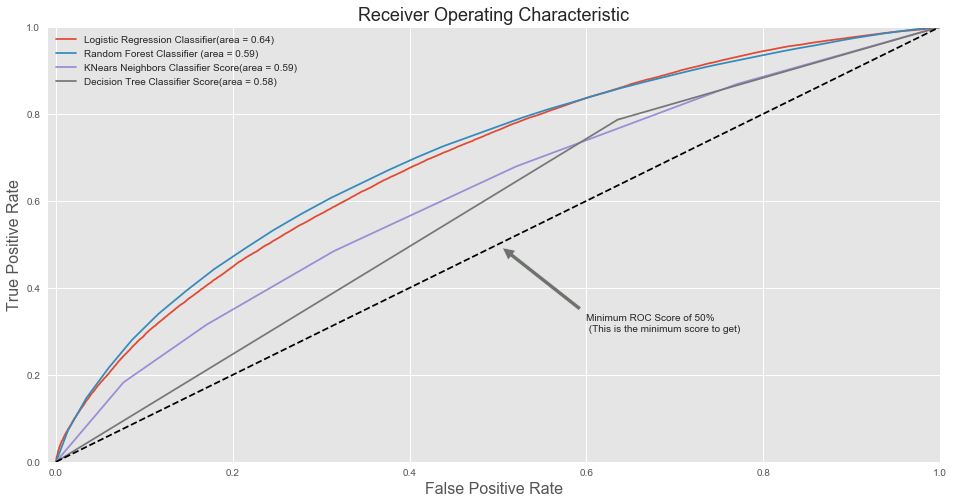

In [44]:
logreg_roc_auc = roc_auc_score(test_target, logreg.predict(test_features))
logreg_fpr, logreg_tpr, logreg_thresold = roc_curve(test_target, logreg.predict_proba(test_features)[:,1])

knn_roc_auc = roc_auc_score(test_target, knn.predict(test_features))
knn_fpr, knn_tpr, knn_threshold = roc_curve(test_target, knn.predict_proba(test_features)[:,1])

rf_clf_roc_auc = roc_auc_score(test_target, rf_clf.predict(test_features))
rf_clf_fpr, rf_clf_tpr, rf_clf_threshold = roc_curve(test_target, rf_clf.predict_proba(test_features)[:,1])

dt_clf_roc_auc = roc_auc_score(test_target, dt_clf.predict(test_features))
dt_clf_fpr, dt_clf_tpr, dt_clf_threshold = roc_curve(test_target, dt_clf.predict_proba(test_features)[:,1])




def graph_roc_curve_multiple(logreg_fpr, logreg_tpr, knn_fpr, knn_tpr, rf_clf_fpr, rf_clf_tpr, dt_clf_fpr, dt_clf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('Receiver Operating Characteristic', fontsize=18)
    plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression Classifier(area = %0.2f)'% logreg_roc_auc)
    plt.plot(rf_clf_fpr, rf_clf_tpr, label='Random Forest Classifier (area = %0.2f)'% rf_clf_roc_auc)
    plt.plot(knn_fpr, knn_tpr, label='KNears Neighbors Classifier Score(area = %0.2f)'% knn_roc_auc)
    plt.plot(dt_clf_fpr, dt_clf_tpr, label='Decision Tree Classifier Score(area = %0.2f)'% dt_clf_roc_auc)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(logreg_fpr, logreg_tpr, knn_fpr, knn_tpr, rf_clf_fpr, rf_clf_tpr, dt_clf_fpr, dt_clf_tpr)
plt.show()


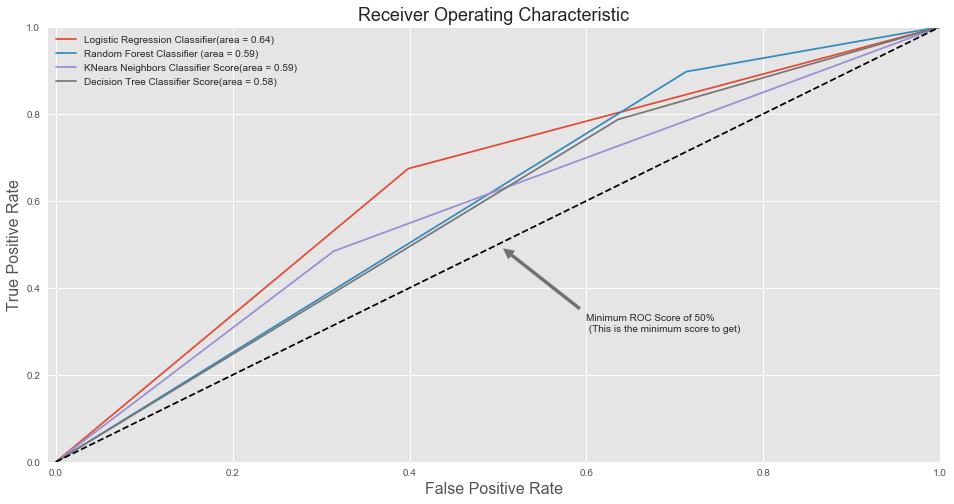

In [46]:
logreg_roc_auc = roc_auc_score(test_target, logreg.predict(test_features))
logreg_fpr, logreg_tpr, logreg_thresold = roc_curve(test_target, logreg.predict(test_features))

knn_roc_auc = roc_auc_score(test_target, knn.predict(test_features))
knn_fpr, knn_tpr, knn_threshold = roc_curve(test_target, knn.predict(test_features))

rf_clf_roc_auc = roc_auc_score(test_target, rf_clf.predict(test_features))
rf_clf_fpr, rf_clf_tpr, rf_clf_threshold = roc_curve(test_target, rf_clf.predict(test_features))

dt_clf_roc_auc = roc_auc_score(test_target, dt_clf.predict(test_features))
dt_clf_fpr, dt_clf_tpr, dt_clf_threshold = roc_curve(test_target, dt_clf.predict(test_features))





def graph_roc_curve_multiple(logreg_fpr, logreg_tpr, knn_fpr, knn_tpr, rf_clf_fpr, rf_clf_tpr, dt_clf_fpr, dt_clf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('Receiver Operating Characteristic', fontsize=18)
    plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression Classifier(area = %0.2f)'% logreg_roc_auc)
    plt.plot(rf_clf_fpr, rf_clf_tpr, label='Random Forest Classifier (area = %0.2f)'% rf_clf_roc_auc)
    plt.plot(knn_fpr, knn_tpr, label='KNears Neighbors Classifier Score(area = %0.2f)'% knn_roc_auc)
    plt.plot(dt_clf_fpr, dt_clf_tpr, label='Decision Tree Classifier Score(area = %0.2f)'% dt_clf_roc_auc)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
graph_roc_curve_multiple(logreg_fpr, logreg_tpr, knn_fpr, knn_tpr, rf_clf_fpr, rf_clf_tpr, dt_clf_fpr, dt_clf_tpr)
plt.show()

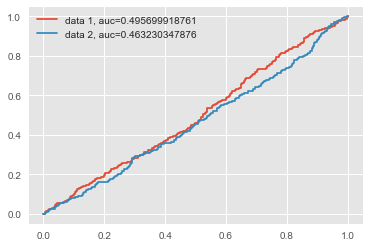

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()

pred = np.random.rand(1000)
label = np.random.randint(2, size=1000)
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

pred = np.random.rand(1000)
label = np.random.randint(2, size=1000)
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="data 2, auc="+str(auc))

plt.legend(loc=0)